In [4]:
#  Lab 2: Classification on Iris Dataset.
#  Objective: In this lab, you will 
#  • Understand and implement various classifiers.
#  • Handle issues like overfitting and validation.
#  • Compare different models.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier

import warnings 
warnings.filterwarnings('ignore')


# Load the Iris dataset
iris = load_iris(as_frame=True)

X = iris.data  
y = iris.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
X.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
 

In [9]:
#Decision tree (Cart)
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dtc)}")
print(confusion_matrix(y_test,y_pred_dtc))
print(classification_report(y_test,y_pred_dtc))

Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



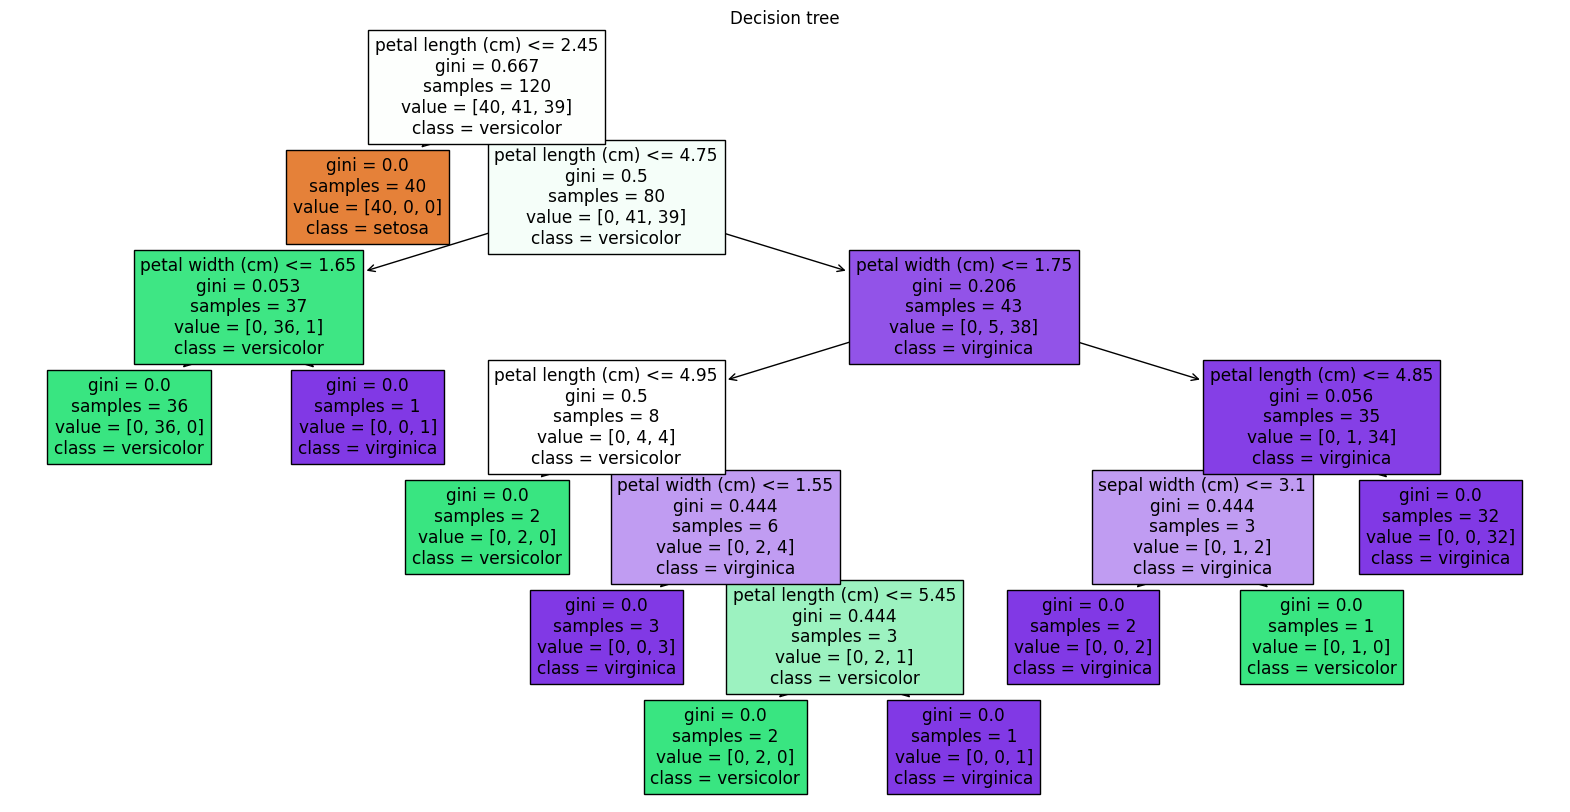

In [10]:
#plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc,filled=True,feature_names=iris.feature_names,class_names=iris.target_names)
plt.title("Decision tree")
plt.show()

In [11]:
print("\nRule-Based Classifier")
from sklearn.tree import export_text
tree_rules = export_text(dtc, feature_names=list(X_train.columns))
print(tree_rules)


Rule-Based Classifier
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1


In [12]:
# k-Nearest Neighbors Classifier
print("k-Nearest Neighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

k-Nearest Neighbors Classifier
Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
# Bayesian Classifier
print("\nBayesian Classifier")
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_gnb)}")
print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))


Bayesian Classifier
Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
# Artificial Neural Network Classifier
print("\nArtificial Neural Network Classifier")
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000,random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


Artificial Neural Network Classifier


Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [15]:
#model comparision using cross -validation
print("Model comparison using Cross-validation")
classifiers={
    "Decision Tree":dtc,
    'K-NN':knn,
    'Naive Bayes':gnb,
    'Neural Network':mlp
}
for name,clf in classifiers.items():
    scores=cross_val_score(clf,X_train,y_train,cv=5)
    print(f"{name} Accuracy:{scores.mean()}(+/-{scores.std()*2})")
    

Model comparison using Cross-validation
Decision Tree Accuracy:0.9416666666666668(+/-0.11303883305208778)
K-NN Accuracy:0.9583333333333334(+/-0.09128709291752769)
Naive Bayes Accuracy:0.9416666666666668(+/-0.1247219128924647)
Neural Network Accuracy:0.975(+/-0.09999999999999999)


In [16]:
#overfitting and validation
param_grid={
    "max_depth":[3,4,5,6,7,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, 
n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found by Grid Search:")
print(grid_search.best_params_)
best_dtc = grid_search.best_estimator_
y_pred_best_dtc = best_dtc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_dtc)}")
print(confusion_matrix(y_test, y_pred_best_dtc))
print(classification_report(y_test, y_pred_best_dtc))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found by Grid Search:
{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
# Grid Search to find optimal hyperparameters for k-NN
print("\nGrid Search for k-Nearest Neighbors")
param_grid_knn = {
'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search_knn = GridSearchCV(estimator=knn, 
param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)
print("Best parameters found by Grid Search for k-NN:")
print(grid_search_knn.best_params_)


Grid Search for k-Nearest Neighbors
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters found by Grid Search for k-NN:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [19]:
# Grid Search to find optimal hyperparameters for MLP Classifier
print("Grid Search for MLP Classifier")
param_grid_mlp = {
'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'],
'alpha': [0.0001, 0.001, 0.01, 0.1],
'learning_rate': ['constant', 'adaptive']
}
grid_search_mlp = GridSearchCV(estimator=mlp,param_grid=param_grid_mlp, cv=5, n_jobs=-1, verbose=2)
grid_search_mlp.fit(X_train, y_train)
print("Best parameters found by Grid Search for MLP Classifier:")
print(grid_search_mlp.best_params_)

Grid Search for MLP Classifier
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters found by Grid Search for MLP Classifier:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'sgd'}


In [20]:
best_mlp = grid_search_mlp.best_estimator_
y_pred_best_mlp = best_mlp.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_mlp)}")
print(confusion_matrix(y_test, y_pred_best_mlp))
print(classification_report(y_test, y_pred_best_mlp))

Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#lab-task: find the best classifier and find best hyperparamerter